In [1]:
%matplotlib inline
import numpy as np
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import os
from glob import glob
import torch
from tqdm import tqdm

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# from EuroSAT_dataset import EuroSAT
from network import Net


%load_ext autoreload
%autoreload 2


if not os.path.exists('./outputs'):
    os.mkdir('./outputs')

print('Imports OK')

/home/burak/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imports OK


In [2]:
# Global parameters

# If USE_CUDA is True, computations will be done using the GPU (may not work in all systems)
# This will make the calculations happen faster
USE_CUDA = torch.cuda.is_available()

DATASET_PATH = './EuroSAT_data'

BATCH_SIZE = 64 # Number of images that are used for calculating gradients at each step

NUM_EPOCHS = 25 # Number of times we will go through all the training images. Do not go over 25

LEARNING_RATE = 0.001 # Controls the step size
BETAS = (0.9, 0.999) # Hyperparameters for gradient descent
WEIGHT_DECAY = 0.0001 # Regularization factor to reduce overfitting

PATIENCE = 3 # Patience for lr scheduler



print('Parameters OK')

Parameters OK


In [3]:
# Create datasets and data loaders
train_dataset = datasets.ImageFolder(DATASET_PATH + '/train', transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor()
]))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = datasets.ImageFolder(DATASET_PATH + '/test', transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)


print('Dataloaders OK')

Dataloaders OK


In [4]:
# Create network
cnn = Net()
#if USE_CUDA:
if USE_CUDA: cnn.cuda()

print('Network OK')

Network OK


In [5]:
# Define criterion, optimizer, and scheduler

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE, betas=BETAS, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, patience=PATIENCE)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.Cyclic

In [6]:
print(len(train_loader.dataset))

21600


In [7]:
print(cnn)

Net(
  (convolutions): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected): Sequential(
    (0): Linear(in_features=8192, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [8]:
# Helper function to organize main loop
# This function is called for training and for testing at each epoch

def run_epoch(net, optimizer, dataloader, criterion, train=True, cuda=USE_CUDA):
    epoch_total_loss = 0
    epoch_total_samples = 0
    epoch_total_correct = 0

    for sample in tqdm(dataloader):
        img, label = sample

        if cuda:
            img = img.cuda()
            label = label.cuda()

        if train: #Be aware that this function should work both for training and testing
            optimizer.zero_grad()
            output = net(img)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            _, pred = torch.max(output.data, 1)
#             'TODO'
        
        else:
            output = net(img)
            loss = criterion(output, label)
            _, pred = torch.max(output.data, 1)
        
        with torch.no_grad():
            epoch_total_samples += label.shape[0] #'TODO'
            epoch_total_loss += loss #'TODO'
            epoch_total_correct += (pred == label).sum() #'TODO'

    return epoch_total_loss / epoch_total_samples, epoch_total_correct / epoch_total_samples



Running epoch 1 of 25...



100%|███████████████████████████████████████████| 85/85 [00:02<00:00, 33.89it/s]



Epoch 1 validation results: Loss=0.014270547777414322 | Accuracy=0.6742592453956604

Current lr: 0.001


Running epoch 2 of 25...



100%|███████████████████████████████████████████| 85/85 [00:02<00:00, 29.41it/s]



Epoch 2 validation results: Loss=0.010298134759068489 | Accuracy=0.7640740871429443

Current lr: 0.001


Running epoch 3 of 25...



100%|███████████████████████████████████████████| 85/85 [00:02<00:00, 29.48it/s]



Epoch 3 validation results: Loss=0.010485711507499218 | Accuracy=0.761296272277832

Current lr: 0.001


Running epoch 4 of 25...



100%|███████████████████████████████████████████| 85/85 [00:02<00:00, 29.67it/s]



Epoch 4 validation results: Loss=0.010032746940851212 | Accuracy=0.7718518376350403

Current lr: 0.001


Running epoch 5 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 28.17it/s]



Epoch 5 validation results: Loss=0.007986010983586311 | Accuracy=0.8224074244499207

Current lr: 0.001


Running epoch 6 of 25...



100%|███████████████████████████████████████████| 85/85 [00:02<00:00, 28.89it/s]



Epoch 6 validation results: Loss=0.008254002779722214 | Accuracy=0.806851863861084

Current lr: 0.001


Running epoch 7 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.19it/s]



Epoch 7 validation results: Loss=0.007204461842775345 | Accuracy=0.8359259366989136

Current lr: 0.001


Running epoch 8 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 28.28it/s]



Epoch 8 validation results: Loss=0.008872520178556442 | Accuracy=0.7994444370269775

Current lr: 0.001


Running epoch 9 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 28.21it/s]



Epoch 9 validation results: Loss=0.007024923339486122 | Accuracy=0.845370352268219

Current lr: 0.001


Running epoch 10 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.64it/s]



Epoch 10 validation results: Loss=0.006234676111489534 | Accuracy=0.8611111044883728

Current lr: 0.001


Running epoch 11 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.40it/s]



Epoch 11 validation results: Loss=0.005465082358568907 | Accuracy=0.8790740966796875

Current lr: 0.001


Running epoch 12 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 28.21it/s]



Epoch 12 validation results: Loss=0.004787268582731485 | Accuracy=0.8946296572685242

Current lr: 0.001


Running epoch 13 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.81it/s]



Epoch 13 validation results: Loss=0.004619690123945475 | Accuracy=0.8961111307144165

Current lr: 0.001


Running epoch 14 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.60it/s]



Epoch 14 validation results: Loss=0.0046851481311023235 | Accuracy=0.8949999809265137

Current lr: 0.001


Running epoch 15 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.33it/s]



Epoch 15 validation results: Loss=0.007450274657458067 | Accuracy=0.82833331823349

Current lr: 0.001


Running epoch 16 of 25...



100%|███████████████████████████████████████████| 85/85 [00:02<00:00, 28.51it/s]



Epoch 16 validation results: Loss=0.006141423247754574 | Accuracy=0.8698148131370544

Current lr: 0.001


Running epoch 17 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 28.05it/s]



Epoch 17 validation results: Loss=0.00495191803202033 | Accuracy=0.8899999856948853

Current lr: 0.001


Running epoch 18 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 26.29it/s]



Epoch 18 validation results: Loss=0.0038857748731970787 | Accuracy=0.9144444465637207

Current lr: 0.001


Running epoch 19 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 26.57it/s]



Epoch 19 validation results: Loss=0.0040394822135567665 | Accuracy=0.9079629778862

Current lr: 0.001


Running epoch 20 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 26.70it/s]



Epoch 20 validation results: Loss=0.0035363752394914627 | Accuracy=0.9205555319786072

Current lr: 0.001


Running epoch 21 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 26.39it/s]



Epoch 21 validation results: Loss=0.003963687922805548 | Accuracy=0.9133333563804626

Current lr: 0.001


Running epoch 22 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 28.20it/s]



Epoch 22 validation results: Loss=0.004176197573542595 | Accuracy=0.9096296429634094

Current lr: 0.001


Running epoch 23 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 26.56it/s]



Epoch 23 validation results: Loss=0.0036445963196456432 | Accuracy=0.9190740585327148

Current lr: 0.001


Running epoch 24 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 27.86it/s]



Epoch 24 validation results: Loss=0.00355075066909194 | Accuracy=0.9246296286582947

Current lr: 0.001


Running epoch 25 of 25...



100%|███████████████████████████████████████████| 85/85 [00:03<00:00, 26.83it/s]



Epoch 25 validation results: Loss=0.004202116746455431 | Accuracy=0.9059259295463562

Current lr: 0.001


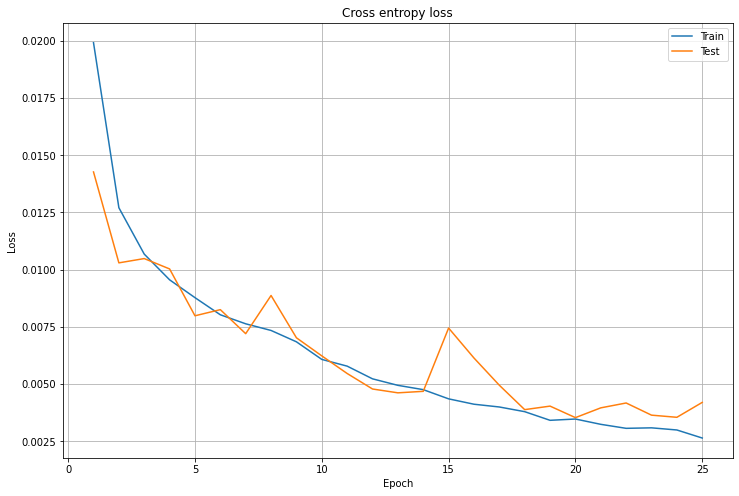

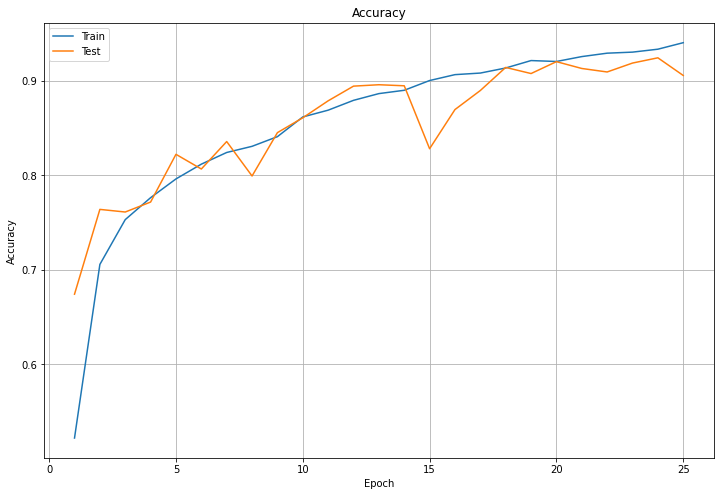

In [9]:
# Main loop

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []
epochs = []

for epoch in range(1, NUM_EPOCHS+1):
    print(f'\n\nRunning epoch {epoch} of {NUM_EPOCHS}...\n')
    epochs.append(epoch)

    #-------------------------Train-------------------------
    # Set network train/test mode to 'train' in the next line
    cnn.train()
    
    loss, accuracy = run_epoch(cnn, optimizer, train_loader, criterion, train=True, cuda=USE_CUDA)
    train_loss.append(loss.cpu())
    train_accuracy.append(accuracy.cpu())
    
    # Update learning rate with scheduler in the next line
    scheduler.step(loss)

    #-------------------------Test--------------------------
    # Set network train/test mode to 'test' in the next line
    cnn.eval()
    
    with torch.no_grad():
        loss, accuracy = run_epoch(cnn, optimizer, test_loader, criterion, train=False, cuda=USE_CUDA)
    test_loss.append(loss.cpu())
    test_accuracy.append(accuracy.cpu())
    print(f'\nEpoch {epoch} validation results: Loss={loss.cpu()} | Accuracy={accuracy.cpu()}\n')

    
    # Plot and save
    plt.figure(figsize=(12, 8), num=1)
    plt.clf()
    plt.plot(epochs, train_loss, label='Train')
    plt.plot(epochs, test_loss, label='Test')
    plt.legend()
    plt.grid()
    plt.title('Cross entropy loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig('outputs/01-loss.pdf')

    plt.figure(figsize=(12, 8), num=2)
    plt.clf()
    plt.plot(epochs, train_accuracy, label='Train')
    plt.plot(epochs, test_accuracy, label='Test')
    plt.legend()
    plt.grid()
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.savefig('outputs/02-accuracy.pdf')

In [10]:
print(f'Final train loss: {train_loss[-1]}')
print(f'Final test loss: {test_loss[-1]}')
print(f'Final train accuracy: {train_accuracy[-1]}')
print(f'Final test accuracy: {test_accuracy[-1]}')

Final train loss: 0.0026449363213032484
Final test loss: 0.004202116746455431
Final train accuracy: 0.9406481385231018
Final test accuracy: 0.9059259295463562
